In [1]:
from sklearn import naive_bayes 
from sklearn import svm
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn import pipeline
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
clsNB = naive_bayes.MultinomialNB()
clsSVM = svm.SVC(kernel='linear')
clsLM = linear_model.LinearRegression()
clslgc = linear_model.logistic.LogisticRegression()

In [3]:
import os
def read_folder(folder_path):
    files = []
    for r, d, f in os.walk(folder_path):
        for file in f:
            if '.txt' in file:
                files.append(os.path.join(r, file))
    return files     

In [4]:
neg_dir = read_folder(r"F:\my data\T2Y4\NLP\review_polarity\txt_sentoken\neg")
pos_dir = read_folder(r"F:\my data\T2Y4\NLP\review_polarity\txt_sentoken\pos")


In [5]:
def read_file(file_path):
    file = open(file_path,'r')
    return file.read()

In [6]:
def read_files(dir_path):
    result = []
    for path in dir_path:
        result.append(read_file(path))
    return result

In [7]:
neg_text = read_files(neg_dir)
pos_text = read_files(pos_dir)
neg_labols =[0]* len(neg_text)
pos_labols = [1] * len(pos_text)

In [8]:
data_text = neg_text + pos_text
data_labols = neg_labols + pos_labols

In [9]:

text_clf_NB = pipeline.Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', clsNB)])
text_clf_svm = pipeline.Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', clsSVM)])
text_clf_LR = pipeline.Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', clsLM)])
text_clf_logc = pipeline.Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', clslgc)])

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_text,data_labols,test_size =0.3, random_state = 1) 

In [11]:
text_clf_LR.fit(x_train,y_train)
text_clf_NB.fit(x_train,y_train)
text_clf_svm.fit(x_train,y_train)
text_clf_logc.fit(x_train,y_train)

C:\Users\Ali Mohamed\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [12]:
import sklearn.metrics as mx

In [13]:
predict_x_test_svm =text_clf_svm.predict(x_test)
predict_x_test_NB = text_clf_NB.predict(x_test)
predict_x_test_LR = text_clf_LR.predict(x_test)
predict_x_test_logc = text_clf_logc.predict(x_test)

In [14]:
print(mx.accuracy_score(y_test , predict_x_test_LR.round()))

0.83


In [15]:
print(mx.accuracy_score(y_test , predict_x_test_NB.round()))

0.755


In [16]:
print(mx.accuracy_score(y_test , predict_x_test_svm, normalize = True))

0.815


In [17]:
print(mx.accuracy_score(y_test , predict_x_test_logc, normalize = True))

0.7933333333333333


In [18]:
text_clf_LR.predict(["this is bad "]).round()

array([-1.])

In [19]:
pip = pipeline.Pipeline([('vect', CountVectorizer(max_features = 40)),('tfidf', TfidfTransformer())])        

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = pip.fit_transform(data_text)
pos = pip.transform(pos_text).todense()
neg = pip.transform(neg_text).todense()
X = pip.fit_transform(data_text).todense()
pca = PCA(n_components=2).fit(X)

data2D_pos = pca.transform(pos)
data2D_neg = pca.transform(neg)
plt.scatter(data2D_pos[:,0], data2D_pos[:,1],c = 'red')
#plt.scatter(data2D_neg[:,0], data2D_neg[:,1],c = 'blue')
plt.show()

<Figure size 640x480 with 1 Axes>

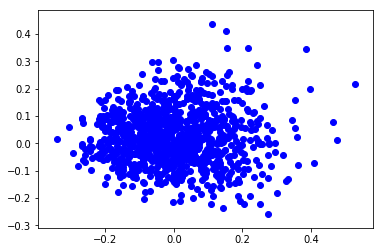

In [21]:
#plt.scatter(data2D_pos[:,0], data2D_pos[:,1],c = 'red')
plt.scatter(data2D_neg[:,0], data2D_neg[:,1],c = 'blue')
plt.show()

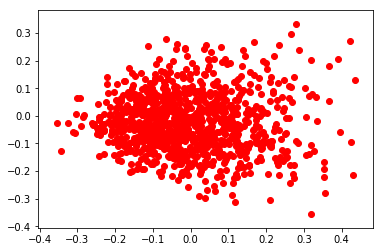

In [22]:
plt.scatter(data2D_pos[:,0], data2D_pos[:,1],c = 'red')
#plt.scatter(data2D_neg[:,0], data2D_neg[:,1],c = 'blue')
plt.show()

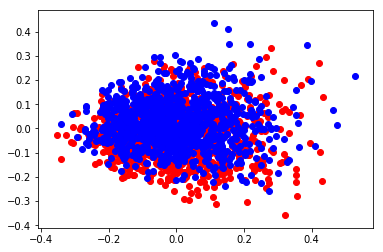

In [23]:
plt.scatter(data2D_pos[:,0], data2D_pos[:,1],c = 'red')
plt.scatter(data2D_neg[:,0], data2D_neg[:,1],c = 'blue')
plt.show()

In [24]:
text_clf_NB.predict(['this is bad'])

array([0])

In [26]:
type(X)

numpy.matrixlib.defmatrix.matrix